<a href="https://colab.research.google.com/github/Sazid669/AI/blob/IFRoS-Master/Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a) Load the data files, verify their data shape.


In [22]:
# Load the dataset
file_path= 'dataset-a.csv'
data = pd.read_csv(file_path, header=1)
X=data.values
print("Shape of the dataset:", X.shape)


Shape of the dataset: (1429, 2)


b) data processing with PCA

In [23]:
def PCA(X,num_components):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean


    n_samples = X.shape[0]
    covariance_matrix = (1 / n_samples) * np.dot(X_centered.T, X_centered)


    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)


    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    max_eigenvalues = eigenvalues[:num_components]
    max_eigenvectors = eigenvectors[:, :num_components]


    projected_data = np.dot(X_centered, max_eigenvectors)
    return projected_data

X[:4]
data_2d=PCA(X,2)
data_2d.shape

(1429, 2)

c) Plot the the data as scatterplot

5 possible number of cluster

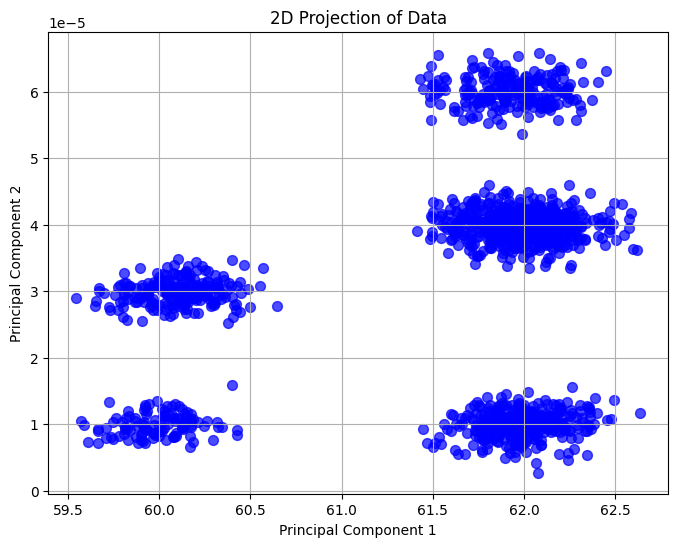

In [24]:
import matplotlib.pyplot as plt

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50, alpha=0.7)
plt.title('2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

d) Implementation of k-mean cluster

In [25]:

X=data_2d

In [26]:
init_centroids = np.array([[1,1], [2, 1], [1,-1], [0,1.5], [-0.5,1.5]])


Running iteration 1/10


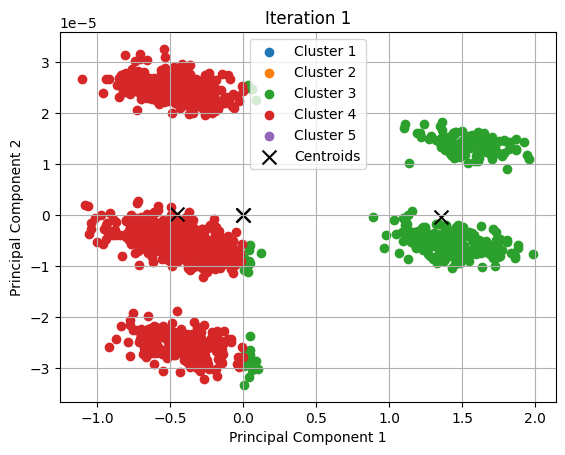

Running iteration 2/10


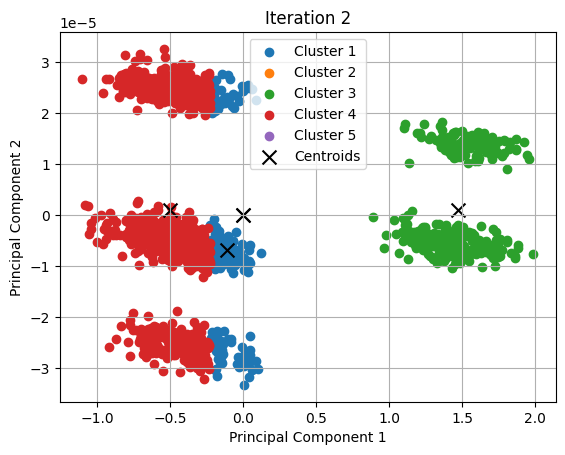

Running iteration 3/10


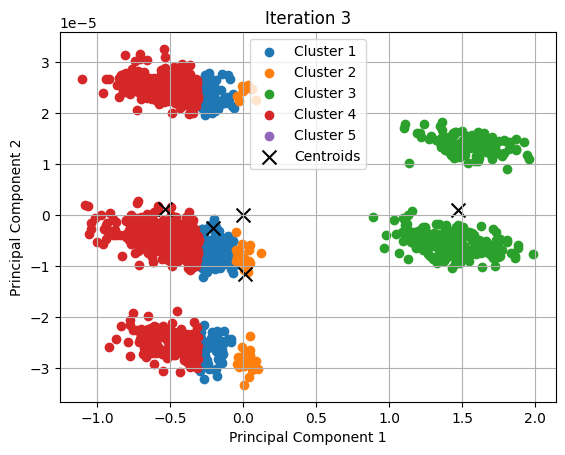

Running iteration 4/10


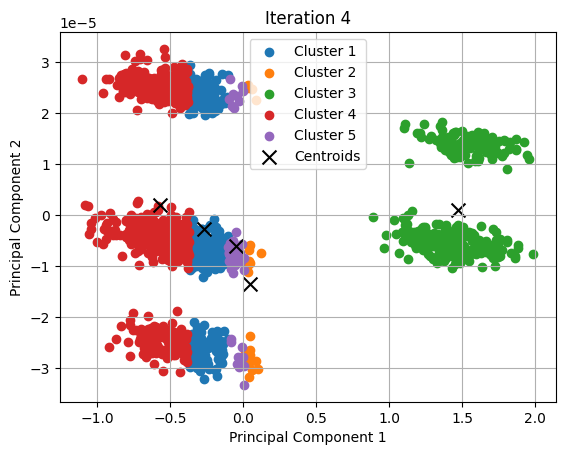

Running iteration 5/10


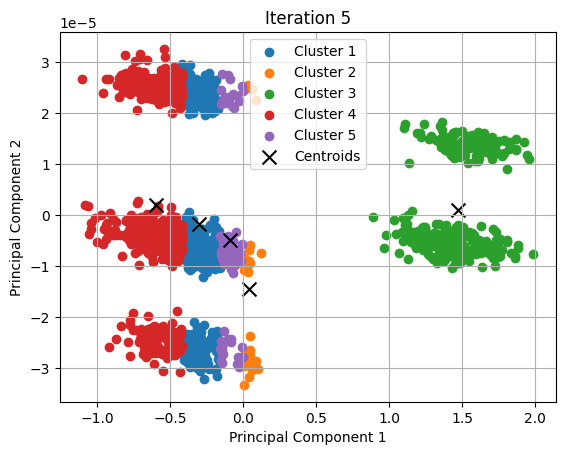

Running iteration 6/10


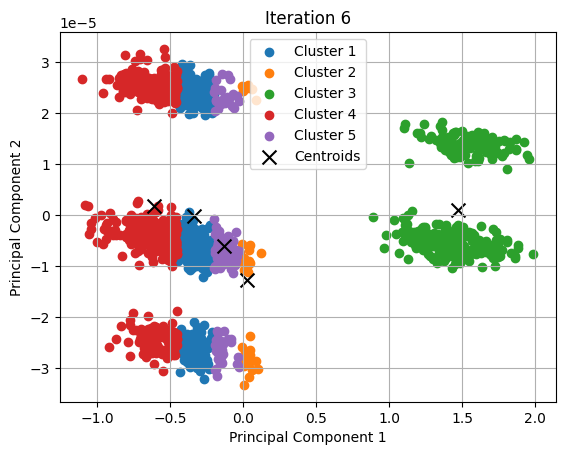

Running iteration 7/10


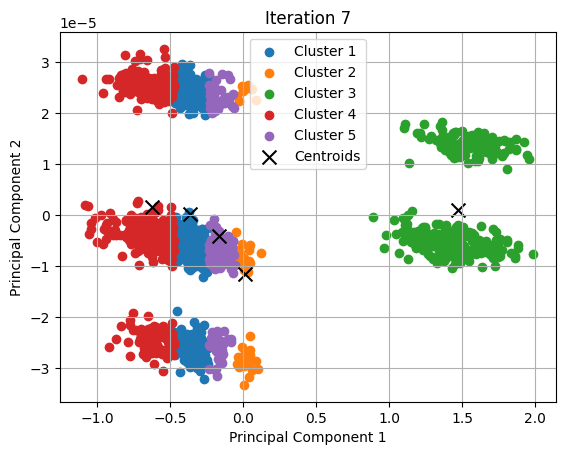

Running iteration 8/10


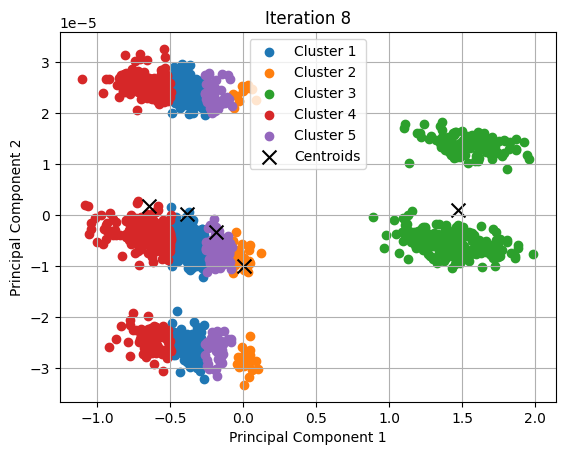

Running iteration 9/10


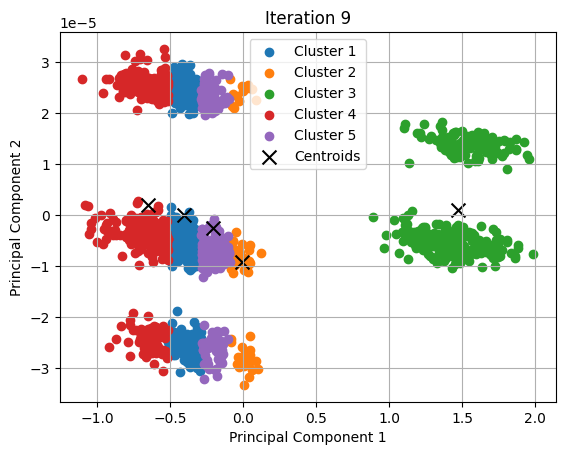

Running iteration 10/10


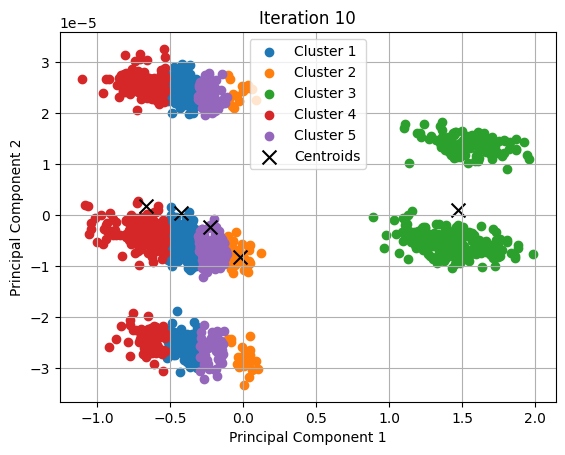

Cluster 1: 442 data points
Cluster 2: 74 data points
Cluster 3: 329 data points
Cluster 4: 369 data points
Cluster 5: 215 data points


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def findClosestCentroids(X, centroids):
    """
    Find the closest centroids for each data point.
    """
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))

    for i in range(X.shape[0]):
        distance = np.inf  # Initialize a large distance
        for k in range(K):
            temp2 = X[i, :] - centroids[k, :]
            # Use np.dot for the squared distance
            dis_t = np.dot(temp2, temp2)
            if dis_t < distance:
                distance = dis_t
                temp1 = k
        idx[i] = temp1
    return idx

def computeCentroids(X, idx, K):
    """
    Compute new centroids as the mean of points in each cluster.
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx.flatten() == k]
        centroids[k, :] = np.mean(points, axis=0) if len(points) > 0 else centroids[k, :]
    return centroids

def runKMeans(X, init_centroids, max_iters, plotProgress=False):
    """
    Run the K-means algorithm.
    """
    m, n = X.shape
    K = init_centroids.shape[0]
    idx = np.zeros((m, 1))
    centroids = init_centroids
    cent_hist = np.zeros((K, n, max_iters+1))
    cent_hist[:, :, 0] = init_centroids

    for i in range(max_iters):
        print(f"Running iteration {i+1}/{max_iters}")
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        cent_hist[:, :, i+1] = centroids


        if plotProgress:
            plt.figure()
            for k in range(K):
                cluster_points = X[idx.flatten() == k]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {k+1}")
            plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label="Centroids")
            plt.title(f"Iteration {i+1}")
            plt.xlabel("Principal Component 1")
            plt.ylabel("Principal Component 2")
            plt.legend()
            plt.grid(True)
            plt.show()

    return centroids, idx



K = 5
max_iters = 10
initial_centroids =  np.array([[-3, -3], [6, 2], [2,-1], [-2,1], [4, -1]])


final_centroids, final_idx = runKMeans(data_2d, initial_centroids, max_iters, plotProgress=True)

for k in range(K):
    cluster_points = data_2d[final_idx.flatten() == k]
    num_points = len(cluster_points)
    print(f"Cluster {k+1}: {num_points} data points")


Problem 2

2(d)

a = 2: Sample Mean = 1.5556, Sample Variance = 0.0800
  Analytical Mean = 1.5556, Analytical Variance = 0.0802
a = 3: Sample Mean = 2.1703, Sample Variance = 0.3074
  Analytical Mean = 2.1667, Analytical Variance = 0.3056
a = 4: Sample Mean = 2.7999, Sample Variance = 0.6581
  Analytical Mean = 2.8000, Analytical Variance = 0.6600


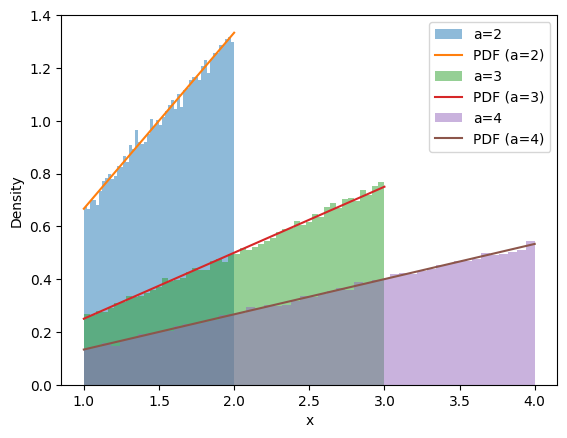

In [33]:
import numpy as np
import matplotlib.pyplot as plt


a_values = [2, 3, 4]
num_samples = 100000


def pdf(x, a):
    A = 2 / (a**2 - 1)
    return A * x

def cdf_inverse(y, a):
    return np.sqrt(y * (a**2 - 1) + 1)


for a in a_values:
    y_samples = np.random.uniform(0, 1, num_samples)
    x_samples = cdf_inverse(y_samples, a)
    plt.hist(x_samples, bins=50, density=True, alpha=0.5, label=f'a={a}')
    x = np.linspace(1, a, 1000)
    plt.plot(x, pdf(x, a), label=f'PDF (a={a})')


    sample_mean = np.mean(x_samples)
    sample_variance = np.var(x_samples)
    print(f"a = {a}: Sample Mean = {sample_mean:.4f}, Sample Variance = {sample_variance:.4f}")
    # Compare with analytical values
    analytical_mean = (2 / (a**2 - 1)) * ((a**3 / 3) - (1 / 3))
    analytical_variance = (2 / (a**2 - 1)) * ((a**4 / 4) - (1 / 4)) - analytical_mean**2
    print(f"  Analytical Mean = {analytical_mean:.4f}, Analytical Variance = {analytical_variance:.4f}")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


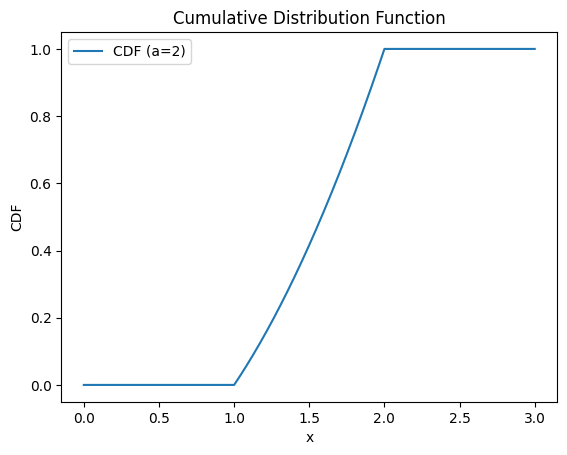

In [30]:
# Define the CDF function for the random variable
def cdf(x, a):
    if x < 1:
        return 0
    elif x > a:
        return 1
    else:
        A = 2 / (a**2 - 1)
        return A * (x**2 / 2 - 1 / 2)

# Example: Compute CDF for a range of x values for a given a
a = 2
x_values = np.linspace(0, 3, 1000)
cdf_values = [cdf(x, a) for x in x_values]

# Plot the CDF
plt.plot(x_values, cdf_values, label=f"CDF (a={a})")
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("Cumulative Distribution Function")
plt.legend()
plt.show()


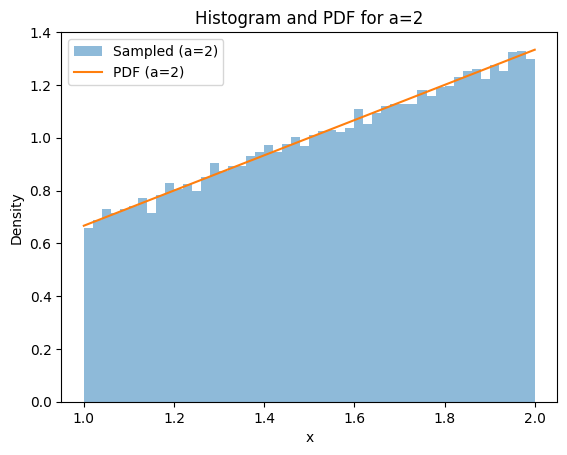

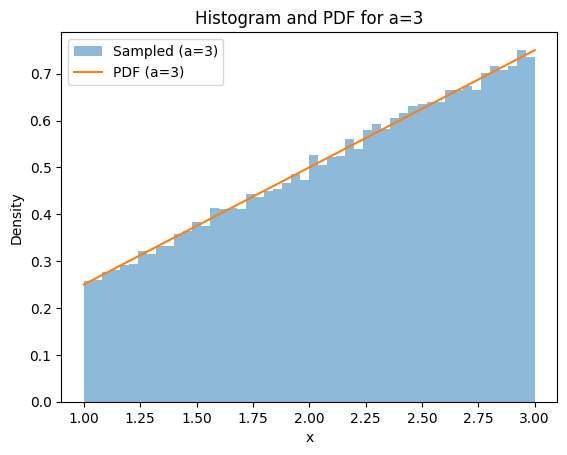

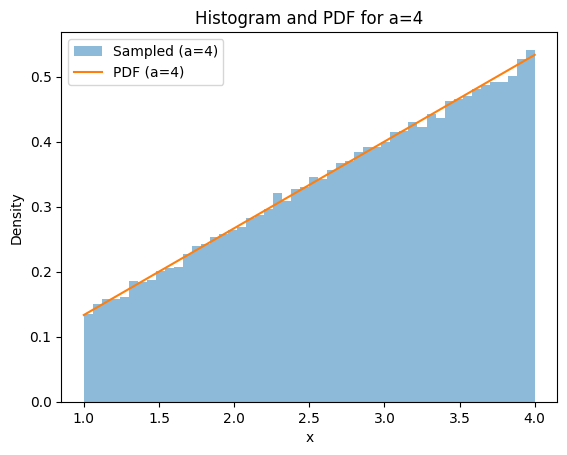

In [31]:
def cdf_inverse(y, a):
    return np.sqrt(y * (a**2 - 1) + 1)


a_values = [2, 3, 4]
num_samples = 100000

for a in a_values:

    y_samples = np.random.uniform(0, 1, num_samples)
    x_samples = cdf_inverse(y_samples, a)


    plt.hist(x_samples, bins=50, density=True, alpha=0.5, label=f'Sampled (a={a})')


    x = np.linspace(1, a, 1000)
    plt.plot(x, pdf(x, a), label=f'PDF (a={a})')

    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title(f"Histogram and PDF for a={a}")
    plt.legend()
    plt.show()
